In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st
import os
import numpy as np
import random
from scipy.stats import linregress
from scipy.stats import pearsonr
import hvplot.pandas
import requests

Full Data Set

In [2]:
# Note you are pulling this from a file outside of your analysis folder, you will need to change code in the analysis section
movie_start_award_df = pd.read_csv('../Data/starting_7351.csv')
movie_start_award_df.shape

(7351, 15)

In [31]:
bins = [0, 10000000, 20000000, 30000000, 50000000, 1000000000]
labels = ['0 - $10M', '10M - $20M', '20M - $50M', '50M - $100M', 'Over $100M']
movie_start_award_df['budget bin'] = pd.cut(movie_start_award_df['budget'], bins, labels=labels, right=True, include_lowest=True)

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_7780/3944217343.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = movie_start_award_df.groupby('budget bin')['title'].count()


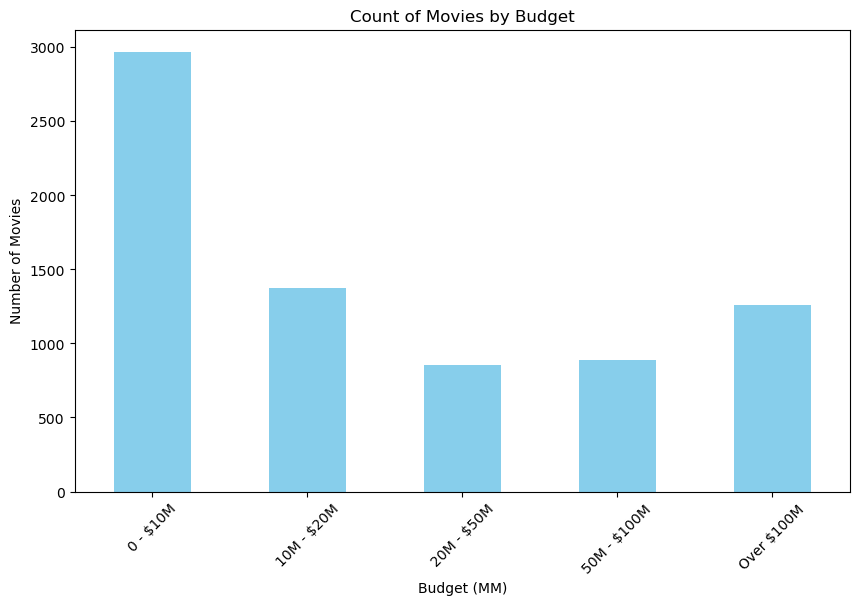

In [32]:
# Groupby Checks
grouped = movie_start_award_df.groupby('budget bin')['title'].count()

# Bar Graph
grouped.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Titles and labels
plt.title('Count of Movies by Budget')
plt.xlabel('Budget (MM)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

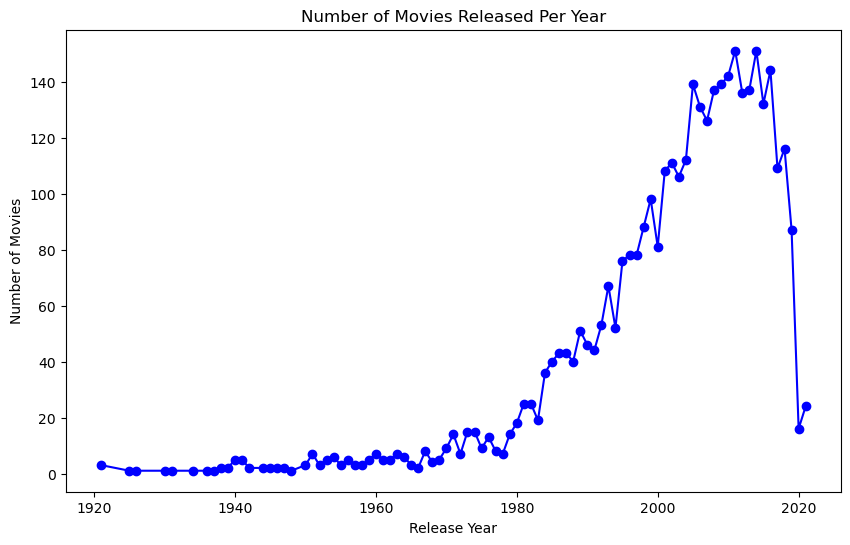

In [27]:
yearly_movies = movie_start_award_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(yearly_movies.index, yearly_movies.values, marker='o', linestyle='-', color='b')  # Create line graph
plt.title('Number of Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(False)  # Enable grid for better readability
plt.show()

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_7780/3905612271.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = movie_start_award_df.groupby('budget bin')['Award Wins'].agg(['sum', 'mean'])


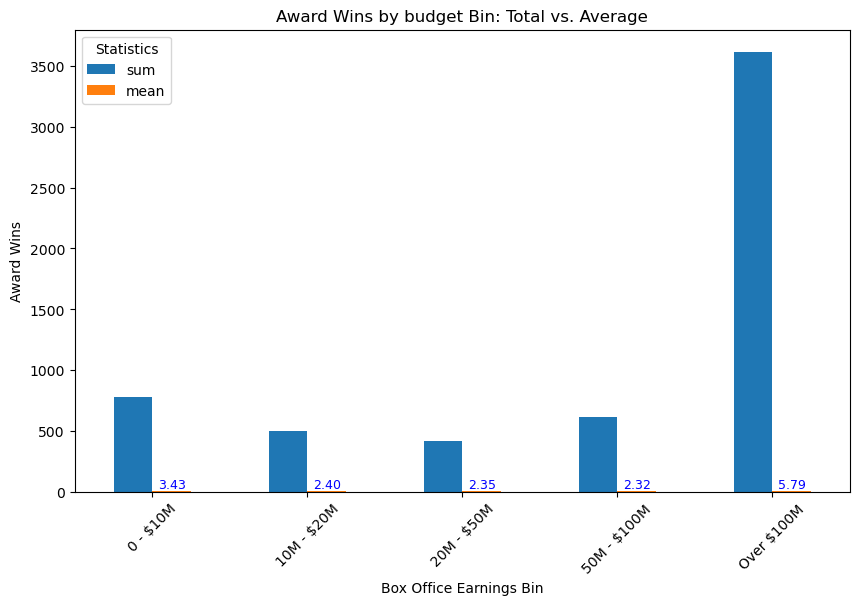

In [48]:
grouped = movie_start_award_df.groupby('budget bin')['Award Wins'].agg(['sum', 'mean'])
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)  # This plots both sum and mean as different bars

# Adding labels and title
plt.title('Award Wins by budget Bin: Total vs. Average')
plt.xlabel('Box Office Earnings Bin')
plt.ylabel('Award Wins')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title='Statistics')

for i, rect in enumerate(ax.patches[len(ax.patches)//2:]):  # Only the second half of patches which correspond to the 'mean'
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{grouped["mean"].iloc[i]:.2f}', 
            ha='center', va='bottom', rotation=0, color='blue', fontsize=9)
    
# Show the plot
plt.show()

In [ ]:
mean_scores = df.groupby('budget bin').agg({
    'Score1': 'mean',
    'Score2': 'mean',
    'Score3': 'mean'
}).reset_index()

Clean Data Set

In [6]:
# Note you are pulling this from a file outside of your analysis folder, you will need to change code in the analysis section
movie_final_award_df = pd.read_csv('../Data/final_1688.csv')
movie_final_award_df.shape

(1688, 15)

In [7]:
movie_final_award_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74.0,87%,159.0,220.0
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74.0,73%,0.0,0.0
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84.0,94%,163.0,164.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83.0,82%,91.0,131.0
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69.0,91%,39.0,81.0


In [8]:
movie_final_award_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1688 non-null   object 
 1   revenue            1688 non-null   int64  
 2   budget             1688 non-null   int64  
 3   profit             1688 non-null   int64  
 4   main_genre         1688 non-null   object 
 5   Runtime(Mins)      1688 non-null   float64
 6   Year               1688 non-null   float64
 7   original_language  1688 non-null   object 
 8   Director_O         1684 non-null   object 
 9   Actors_O           1688 non-null   object 
 10  Rating             1688 non-null   float64
 11  Metascore_O        1672 non-null   float64
 12  Rotten_Tomato_O    1678 non-null   object 
 13  Award Wins         1688 non-null   float64
 14  Award Nominations  1688 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 197.9+ KB


In [9]:
def convert_to_float(x):
    try:
        if isinstance(x, (int, float)):
            return float(x)
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%')) / 100  # Convert to decimal
            return float(x)
    except (ValueError, TypeError):
        return np.nan
    
movie_final_award_df['Rotten_Tomato_O'] = movie_final_award_df['Rotten_Tomato_O'].apply(convert_to_float)
print(movie_final_award_df['Rotten_Tomato_O'])

0       0.87
1       0.73
2       0.94
3       0.82
4       0.91
        ... 
1683    0.83
1684    0.69
1685    0.50
1686    0.71
1687    0.88
Name: Rotten_Tomato_O, Length: 1688, dtype: float64


In [10]:
if movie_final_award_df['Rotten_Tomato_O'].max() <= 1.0:
    movie_final_award_df['Rotten_Tomato_O'] = (movie_final_award_df['Rotten_Tomato_O'] * 100)

# Apply multiplication to 'Rating' if it hasn't been scaled up yet
if movie_final_award_df['Rating'].max() <= 10:
    movie_final_award_df['Rating'] = (movie_final_award_df['Rating'] * 10)

movie_final_award_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",88.0,74.0,87.0,159.0,220.0
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",86.0,74.0,73.0,0.0,0.0
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",90.0,84.0,94.0,163.0,164.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",78.0,83.0,82.0,91.0,131.0
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",80.0,69.0,91.0,39.0,81.0


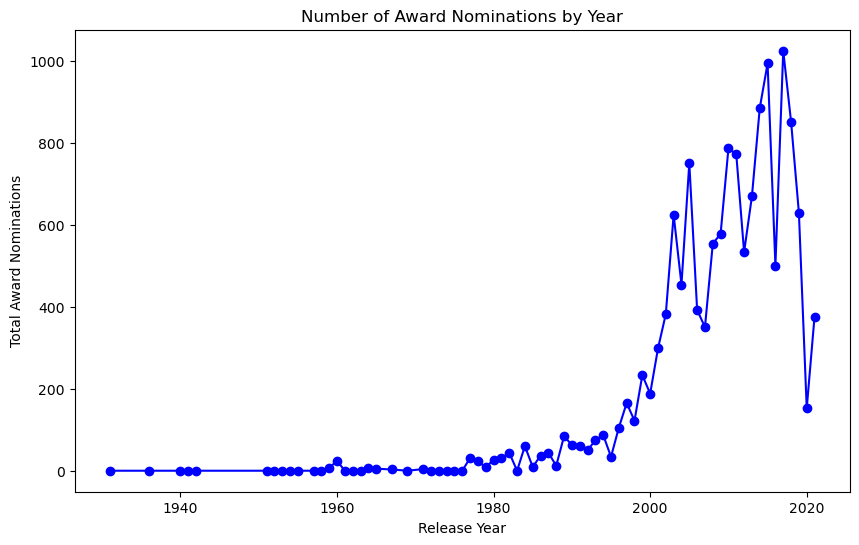

In [12]:
nominations_by_year = movie_final_award_df.groupby('Year')['Award Nominations'].sum()

# Reset index to make 'Release Year' a column again for easier plotting
nominations_by_year = nominations_by_year.reset_index()
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(nominations_by_year['Year'], nominations_by_year['Award Nominations'], marker='o', linestyle='-', color='b')
plt.title('Number of Award Nominations by Year')
plt.xlabel('Release Year')
plt.ylabel('Total Award Nominations')
plt.grid(False)  # Enable grid for better readability
plt.show()

The r-value is: PearsonRResult(statistic=0.34341665009999695, pvalue=6.422751313719934e-48)


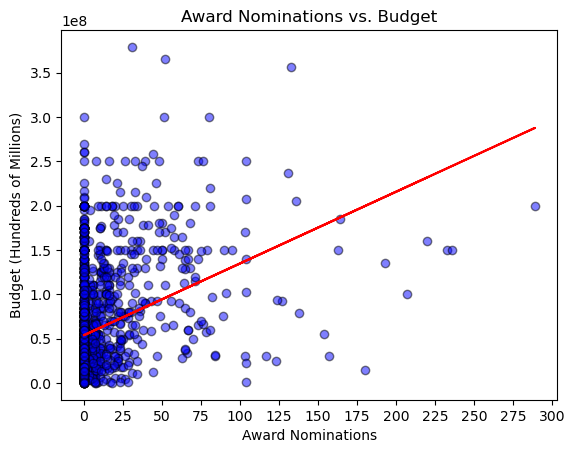

In [13]:
# Define my x and y axis
award_noms_x = movie_final_award_df['Award Nominations']
total_gross_y = movie_final_award_df['budget']

# Correlation
correlation = st.pearsonr(award_noms_x, total_gross_y) 

#Linear Regression
(slope, intercept, r_value, p_value, std_err) = linregress(award_noms_x, total_gross_y)
regress_values = award_noms_x * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(award_noms_x, total_gross_y, 
            marker='o', 
            facecolors='blue', 
            edgecolors='black',
            alpha=0.5)

plt.plot(award_noms_x, regress_values, "r-")  # Corrected to use regress_values
#plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction',
#             fontsize=12, color="red", verticalalignment='top')

ax = plt.gca() 
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax.xaxis.set_major_locator(ticker.MaxNLocator(15))

# Title, labels, and aesthetics
plt.title('Award Nominations vs. Budget')
plt.xlabel('Award Nominations')
plt.ylabel('Budget (Hundreds of Millions)')
plt.grid(False)

print(f'The r-value is: {correlation}')

The r-value is: PearsonRResult(statistic=0.2292271143609786, pvalue=1.4538695798120637e-21)


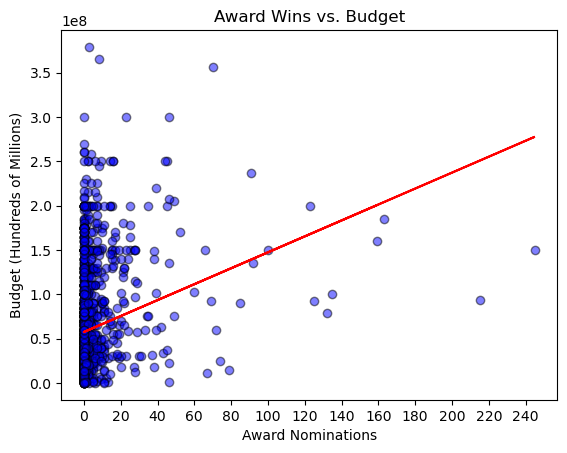

In [34]:
# Define my x and y axis
award_noms_x = movie_final_award_df['Award Wins']
total_gross_y = movie_final_award_df['budget']

# Correlation
correlation = st.pearsonr(award_noms_x, total_gross_y) 

#Linear Regression
(slope, intercept, r_value, p_value, std_err) = linregress(award_noms_x, total_gross_y)
regress_values = award_noms_x * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(award_noms_x, total_gross_y, 
            marker='o', 
            facecolors='blue', 
            edgecolors='black',
            alpha=0.5)

plt.plot(award_noms_x, regress_values, "r-")  # Corrected to use regress_values
#plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction',
#             fontsize=12, color="red", verticalalignment='top')

ax = plt.gca() 
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax.xaxis.set_major_locator(ticker.MaxNLocator(15))

# Title, labels, and aesthetics
plt.title('Award Wins vs. Budget')
plt.xlabel('Award Nominations')
plt.ylabel('Budget (Hundreds of Millions)')
plt.grid(False)

print(f'The r-value is: {correlation}')

In [40]:
bins = [0, 10000000, 20000000, 30000000, 50000000, 1000000000]
labels = ['0 - $10M', '10M - $20M', '20M - $50M', '50M - $100M', 'Over $100M']
movie_final_award_df['budget bin'] = pd.cut(movie_final_award_df['budget'], bins, labels=labels, right=True, include_lowest=True)

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_7780/1050069397.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = movie_final_award_df.groupby('budget bin')['Award Wins'].agg(['sum', 'mean'])


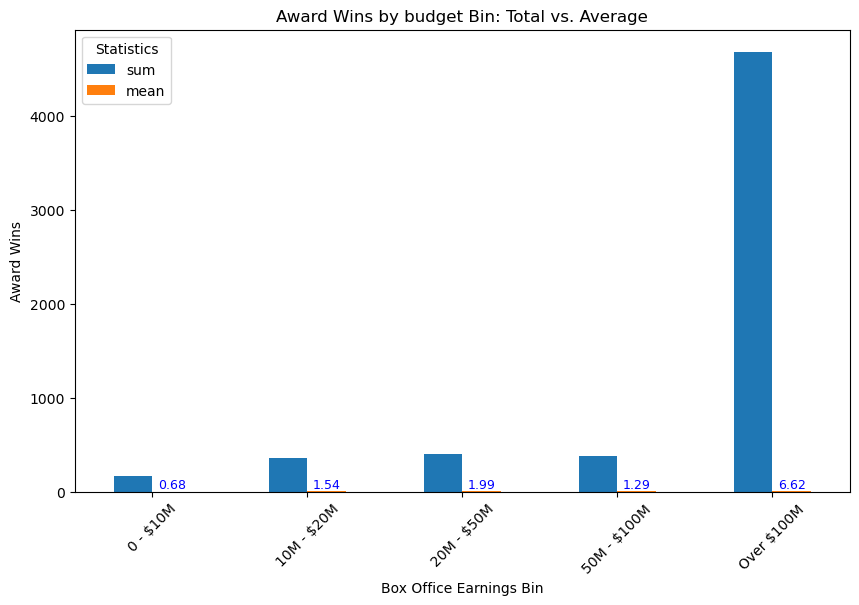

In [41]:
grouped = movie_final_award_df.groupby('budget bin')['Award Wins'].agg(['sum', 'mean'])
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)  # This plots both sum and mean as different bars

# Adding labels and title
plt.title('Award Wins by budget Bin: Total vs. Average')
plt.xlabel('Box Office Earnings Bin')
plt.ylabel('Award Wins')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title='Statistics')

for i, rect in enumerate(ax.patches[len(ax.patches)//2:]):  # Only the second half of patches which correspond to the 'mean'
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{grouped["mean"].iloc[i]:.2f}', 
            ha='center', va='bottom', rotation=0, color='blue', fontsize=9)
    
# Show the plot
plt.show()

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_7780/1194698052.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = movie_final_award_df.groupby('budget bin').agg({


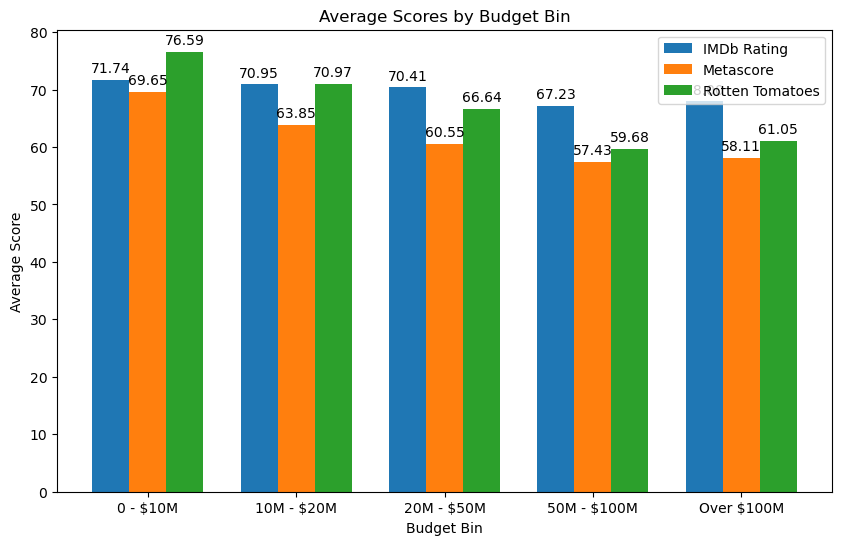

In [46]:
# Group by 'budget bin' and calculate mean for each score
mean_scores = movie_final_award_df.groupby('budget bin').agg({
    'Rating': 'mean',
    'Metascore_O': 'mean',
    'Rotten_Tomato_O': 'mean'
}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # width of the bars

# Generating x positions for the bar groups
x = range(len(mean_scores))

bars1 = ax.bar(x, mean_scores['Rating'], width=width, label='IMDb Rating', align='center')
bars2 = ax.bar([p + width for p in x], mean_scores['Metascore_O'], width=width, label='Metascore', align='center')
bars3 = ax.bar([p + width*2 for p in x], mean_scores['Rotten_Tomato_O'], width=width, label='Rotten Tomatoes', align='center')

# Adding labels and title
ax.set_xlabel('Budget Bin')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Budget Bin')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(mean_scores['budget bin'])
ax.set_

# Annotating the average values
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Adding a legend
ax.legend()

# Show the plot
plt.show()

The r-value is: PearsonRResult(statistic=0.2460272326034572, pvalue=1.0816601692495992e-24)


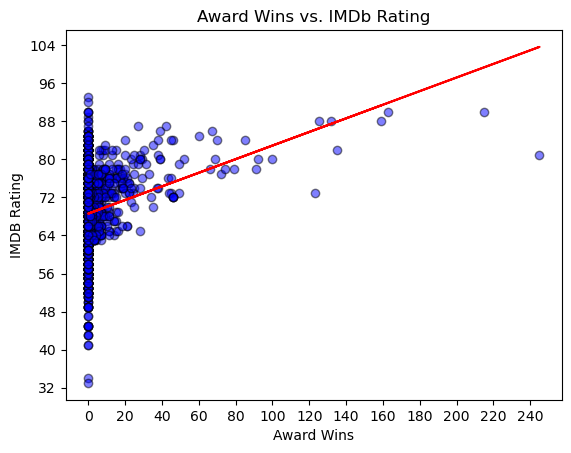

In [50]:
# Define my x and y axis
award_x = movie_final_award_df['Award Wins']
rating_y = movie_final_award_df['Rating']

# Correlation
correlation = st.pearsonr(award_x, rating_y) 

#Linear Regression
(slope, intercept, r_value, p_value, std_err) = linregress(award_x, rating_y)
regress_values = award_x * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(award_x, rating_y, 
            marker='o', 
            facecolors='blue', 
            edgecolors='black',
            alpha=0.5)

plt.plot(award_x, regress_values, "r-")  # Corrected to use regress_values
#plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction',
#             fontsize=12, color="red", verticalalignment='top')

ax = plt.gca() 
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax.xaxis.set_major_locator(ticker.MaxNLocator(15))

# Title, labels, and aesthetics
plt.title('Award Wins vs. IMDb Rating')
plt.xlabel('Award Wins')
plt.ylabel('IMDB Rating')
plt.grid(False)

print(f'The r-value is: {correlation}')